In [1]:
import sys
dirname = '/Users/muhammaddaffarobani/Documents/personal_research/smt'
if dirname not in sys.path:
    sys.path.append(dirname)
from smt.utils.design_space import (
    DesignSpace,
    FloatVariable,
    CategoricalVariable,
)
from smt.applications.mixed_integer import (
    MixedIntegerKrigingModel,
)
from smt.surrogate_models import (
    KPLS,
    MixIntKernelType,
    MixHrcKernelType,
)
from sklearn.metrics import mean_squared_error
from smt.explainability_tools import ShapFeatureImportanceDisplay, ShapDisplay

import time
import numpy as np


In [2]:
"""Problem definition"""
# Design space
ds = DesignSpace([
    CategoricalVariable([
        "1", 
        "2", 
        "3", 
        "4", 
        "5", 
        "6", 
        "7", 
        "8", 
        "9", 
        "10", 
        "11", 
        "12",
    ]),
    FloatVariable(10.0, 20.0),
    FloatVariable(1.0, 2.0),
])


# Objective function
def y(X):
    listI = [
        0.0833,
        0.139,
        0.380,
        0.0796,
        0.133,
        0.363,
        0.0859,
        0.136,
        0.360,
        0.0922,
        0.138,
        0.369,
        ]
    
    I = np.int64(X[0])
    L = X[1]
    S = X[2]
    Ival = listI[I]

    E = 200e9
    P = 50e3

    y = (P * L**3) / (3 * E * S**2 * Ival)

    return y

f_obj = y

# Create training and testing data
n_data = 750
n_train = int(0.8 * n_data)
n_test = n_data - n_train
xdoe, _ = ds.sample_valid_x(n_data)
y_doe = [f_obj(xdoe[i]) for i in range(len(xdoe))]

X_tr, y_tr = xdoe[:n_train, :], y_doe[:n_train]
X_te, y_te = xdoe[n_train:, :], y_doe[n_train:]
y_tr, y_te = np.array(y_tr), np.array(y_te)
inverse_categories_map = {0: {i: f"{i+1}" for i in range(12)}}

"""Modelling"""
sm = MixedIntegerKrigingModel(
    surrogate=KPLS(
        design_space=ds,
        categorical_kernel=MixIntKernelType.HOMO_HSPHERE,
        hierarchical_kernel=MixHrcKernelType.ARC_KERNEL,
        theta0=np.array([4.43799547e-04, 4.39993134e-01, 1.59631650e+00]),
        corr="squar_exp",
        n_start=1,
        cat_kernel_comps=[2],
        n_comp=2,
        print_global=False,
        ),
    )
start_time = time.time()
sm.set_training_values(X_tr, np.array(y_tr))
sm.train()
print("run time (s):", time.time() - start_time)
y_pred = sm.predict_values(X_te)
rmse = mean_squared_error(y_te, y_pred, squared=False)
rrmse = rmse / y_te.mean()
print(f"RMSE: {rmse:.4f}")
print(f"rRMSE: {rrmse:.4f}")


run time (s): 72.73974680900574
RMSE: 0.0000
rRMSE: 0.0005


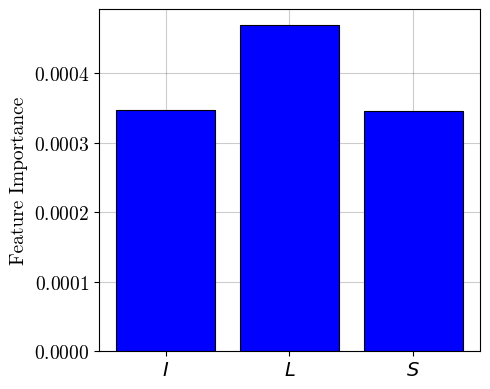

In [3]:
model = sm
feature_names = [
    r'$I$', 
    r'$L$', 
    r'$S$', 
]
categorical_features = [0]

feature_importance = ShapFeatureImportanceDisplay.from_surrogate_model(
    model, 
    X_tr, 
    feature_names=feature_names,
    categorical_features=categorical_features,
)

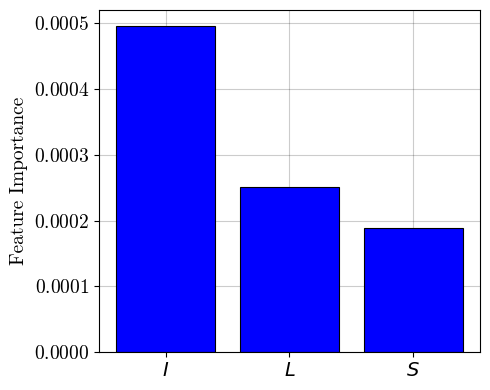

In [4]:
model = sm
feature_names = [
    r'$I$', 
    r'$L$', 
    r'$S$', 
]
categorical_features = [0]

feature_importance = ShapFeatureImportanceDisplay.from_surrogate_model(
    model, 
    X_tr, 
    feature_names=feature_names,
)

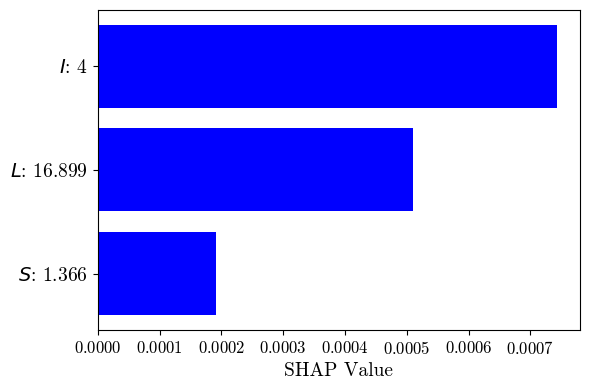

In [5]:
instance = X_te[0].reshape(1, -1)
model = sm
feature_names = [
    r'$I$', 
    r'$L$', 
    r'$S$', 
]
categorical_features = [0]
categories_map = inverse_categories_map
# filename = "example_results/shap/blabla.png"

display = ShapDisplay.from_surrogate_model(
    instance, 
    model, 
    X_tr, 
    feature_names=feature_names,
    categorical_features=categorical_features,
    categories_map=categories_map,
)
# display.individual_plot(filename=filename)
display.individual_plot()

In [6]:
instances = X_tr
model = sm
feature_names = [
    r'$I$', 
    r'$L$', 
    r'$S$', 
]
categorical_features = [0]
categories_map = inverse_categories_map
# categories_map=None
shap_explainer = ShapDisplay.from_surrogate_model(
    instances, 
    model, 
    X_tr, 
    feature_names=feature_names,
    categorical_features=categorical_features,
    categories_map=categories_map,
)

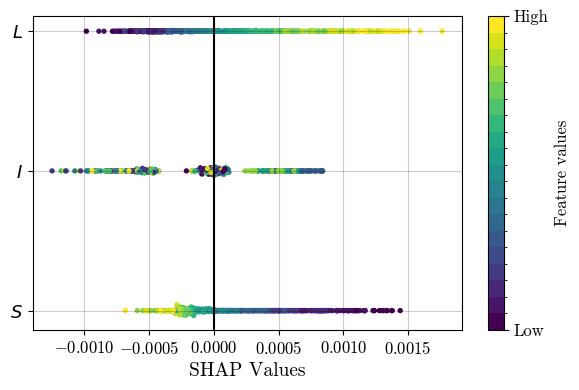

In [10]:
shap_explainer.summary_plot(figsize=(6, 4), n_color=20)

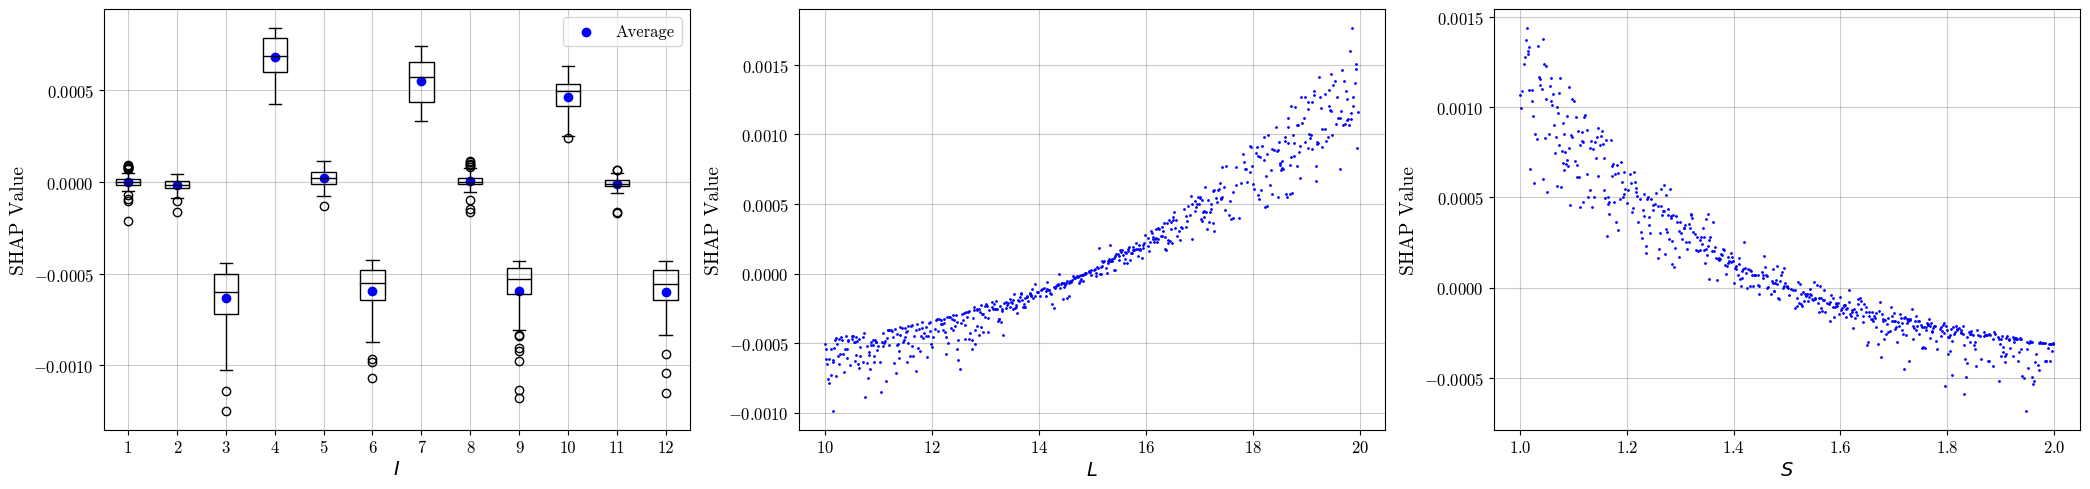

In [8]:
features = [0, 1, 2]

shap_explainer.dependence_plot(
    features
)

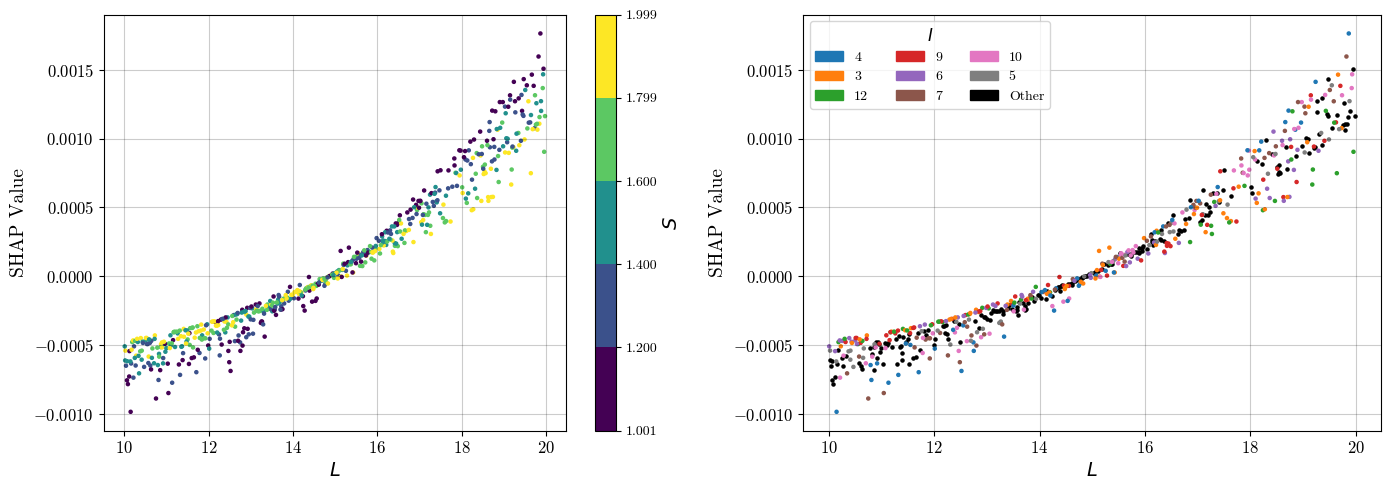

In [9]:
feature_pairs = [(1, 2), (1, 0)]
categories_args = {0: {
    "sort_based_on_importance": True,
    "num_entities": 8,
    "selected_entities": None
}}
shap_explainer.interaction_plot(
    feature_pairs, 
    categories_args=categories_args,
    n_color=5,
)

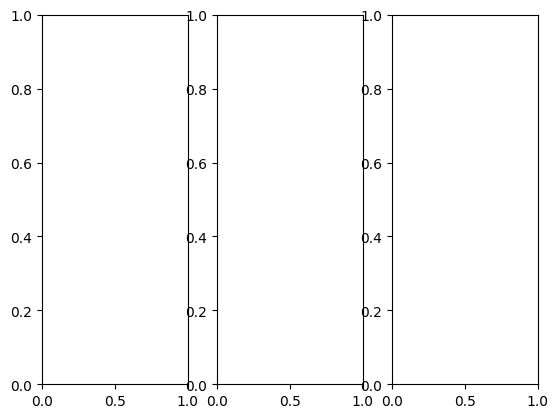

In [21]:
import matplotlib.pyplot as plt
fig, axs = plt.subplots(1, 3)

In [25]:
categories_map

NameError: name 'categories_map' is not defined

In [23]:
len(axs.shape)

1

In [19]:
axs[0, 0].get_subplotspec().get_gridspec().get_geometry()

(2, 3)

In [9]:
axs[0].get_gridspec()

GridSpec(1, 3)

In [3]:
dir(fig)

['_PROPERTIES_EXCLUDED_FROM_SET',
 '__class__',
 '__delattr__',
 '__dict__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__getstate__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__le__',
 '__lt__',
 '__module__',
 '__ne__',
 '__new__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__setattr__',
 '__setstate__',
 '__sizeof__',
 '__str__',
 '__subclasshook__',
 '__weakref__',
 '_add_axes_internal',
 '_agg_filter',
 '_align_label_groups',
 '_alpha',
 '_animated',
 '_axobservers',
 '_axstack',
 '_button_pick_id',
 '_callbacks',
 '_canvas_callbacks',
 '_check_layout_engines_compat',
 '_clipon',
 '_clippath',
 '_cm_set',
 '_default_contains',
 '_dpi',
 '_fig_callbacks',
 '_fully_clipped_to_axes',
 '_gci',
 '_get_dpi',
 '_get_draw_artists',
 '_get_renderer',
 '_gid',
 '_in_layout',
 '_internal_update',
 '_label',
 '_layout_engine',
 '_localaxes',
 '_mouse_key_ids',
 '_mouseover',
 '_norm_per_subplot_kw',
 '_normalize_grid_string',
 

In [5]:
fig.get_gridspec

AttributeError: 'Figure' object has no attribute 'get_gridspec'